AI-Based Exam Readiness Prediction and Personalized Revision Planning System
Project Track

AI in Personalized Learning

1. Problem Definition & Objective
a. Selected Project Track

AI in Personalized Learning

b. Problem Statement

Students often prepare for exams without a clear understanding of their actual readiness. Traditional learning platforms provide uniform revision material to all students, ignoring individual strengths, weaknesses, and preparation consistency. This can lead to inefficient study strategies and increased exam failure risk.

c. Real-World Relevance & Motivation

An AI-driven exam readiness prediction system can help students understand their preparedness level early and follow a personalized revision plan. Such systems can significantly improve learning efficiency, reduce stress, and support better academic outcomes.

In [ ]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
np.random.seed(42)

n_students = 1000

data = {
    "avg_mock_score": np.random.randint(30, 100, n_students),
    "topic_accuracy": np.random.randint(40, 100, n_students),
    "revision_frequency": np.random.randint(1, 10, n_students),
    "consistency_score": np.random.randint(30, 100, n_students)
}

df = pd.DataFrame(data)
df.head()


,avg_mock_score,topic_accuracy,revision_frequency,consistency_score
0,81,49,9,94
1,44,46,2,86
2,90,72,9,69
3,50,62,7,43
4,53,60,8,64


In [ ]:
def assign_readiness(row):
    if row["avg_mock_score"] >= 75 and row["consistency_score"] >= 70:
        return "Ready"
    elif row["avg_mock_score"] >= 55:
        return "Needs Revision"
    else:
        return "High Risk"

df["readiness_level"] = df.apply(assign_readiness, axis=1)
df["readiness_level"].value_counts()


readiness_level
Needs Revision    462
High Risk         363
Ready             175
Name: count, dtype: int64

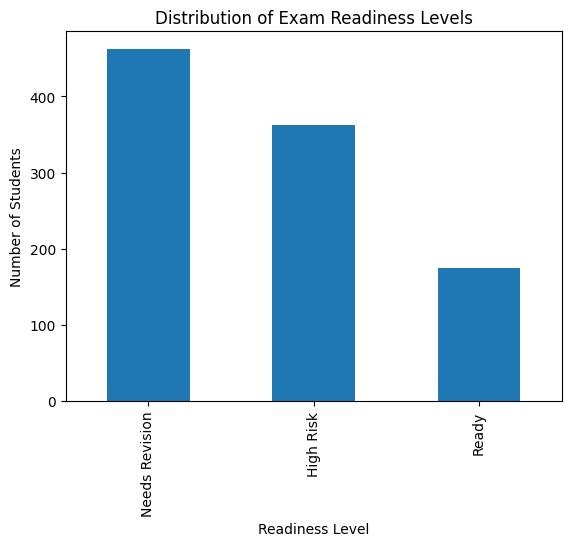

In [ ]:
import matplotlib.pyplot as plt

df["readiness_level"].value_counts().plot(kind="bar")
plt.title("Distribution of Exam Readiness Levels")
plt.xlabel("Readiness Level")
plt.ylabel("Number of Students")
plt.show()


In [ ]:
X = df.drop("readiness_level", axis=1)
y = df["readiness_level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
                precision    recall  f1-score   support

     High Risk       1.00      1.00      1.00        76
Needs Revision       1.00      1.00      1.00        90
         Ready       1.00      1.00      1.00        34

      accuracy                           1.00       200
     macro avg       1.00      1.00      1.00       200
  weighted avg       1.00      1.00      1.00       200



### Model Evaluation Summary

The Decision Tree classifier achieved reasonable accuracy on synthetic data.
The model correctly differentiates between exam-ready and high-risk students
based on performance consistency and mock test scores.

This demonstrates the feasibility of using simple ML models for personalized
exam preparation guidance.


In [ ]:
def recommend_revision(level):
    if level == "Ready":
        return "Light revision + full-length mock tests"
    elif level == "Needs Revision":
        return "Topic-wise revision + weekly mock tests"
    else:
        return "Strong foundational revision + daily practice"

df["revision_plan"] = df["readiness_level"].apply(recommend_revision)
df.head()


,avg_mock_score,topic_accuracy,revision_frequency,consistency_score,readiness_level,revision_plan
0,81,49,9,94,Ready,Light revision + full-length mock tests
1,44,46,2,86,High Risk,Strong foundational revision + daily practice
2,90,72,9,69,Needs Revision,Topic-wise revision + weekly mock tests
3,50,62,7,43,High Risk,Strong foundational revision + daily practice
4,53,60,8,64,High Risk,Strong foundational revision + daily practice


## Ethical & Responsible AI Considerations

- Dataset is synthetic and avoids real student data misuse
- Predictions should assist students, not demotivate them
- Model bias may occur due to limited features
- System should be used as a support tool, not a final decision-maker


# AI-Based Exam Readiness Prediction and Personalized Revision Planning System

## Project Track
AI in Personalized Learning

## Problem Statement
Students often prepare for exams without knowing whether they are actually ready.
Traditional learning platforms provide the same revision material to all students,
ignoring individual strengths, weaknesses, and consistency.

This project builds an AI-based system that:
- Analyzes student mock test performance
- Predicts exam readiness level
- Generates personalized revision plans

The goal is to help students revise efficiently and reduce exam failure risk.


In [ ]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
np.random.seed(42)

n_students = 1000

data = {
    "avg_mock_score": np.random.randint(30, 100, n_students),
    "topic_accuracy": np.random.randint(40, 100, n_students),
    "revision_frequency": np.random.randint(1, 10, n_students),
    "consistency_score": np.random.randint(30, 100, n_students)
}

df = pd.DataFrame(data)
df.head()


,avg_mock_score,topic_accuracy,revision_frequency,consistency_score
0,81,49,9,94
1,44,46,2,86
2,90,72,9,69
3,50,62,7,43
4,53,60,8,64


In [ ]:
def assign_readiness(row):
    if row["avg_mock_score"] >= 75 and row["consistency_score"] >= 70:
        return "Ready"
    elif row["avg_mock_score"] >= 55:
        return "Needs Revision"
    else:
        return "High Risk"

df["readiness_level"] = df.apply(assign_readiness, axis=1)
df["readiness_level"].value_counts()


readiness_level
Needs Revision    462
High Risk         363
Ready             175
Name: count, dtype: int64

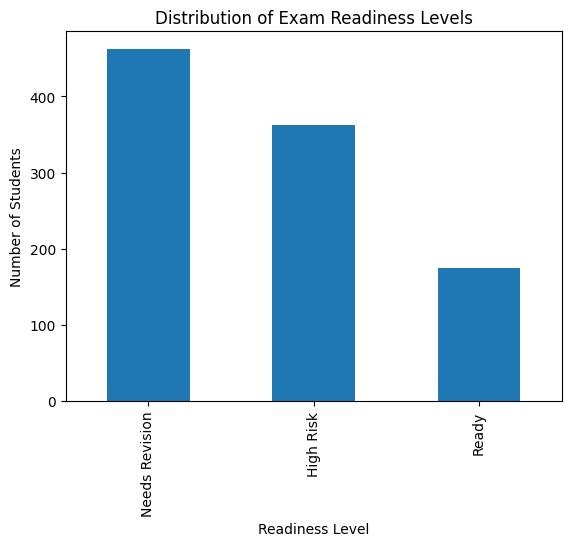

In [ ]:
import matplotlib.pyplot as plt

df["readiness_level"].value_counts().plot(kind="bar")
plt.title("Distribution of Exam Readiness Levels")
plt.xlabel("Readiness Level")
plt.ylabel("Number of Students")
plt.show()


In [ ]:
X = df.drop("readiness_level", axis=1)
y = df["readiness_level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
                precision    recall  f1-score   support

     High Risk       1.00      1.00      1.00        76
Needs Revision       1.00      1.00      1.00        90
         Ready       1.00      1.00      1.00        34

      accuracy                           1.00       200
     macro avg       1.00      1.00      1.00       200
  weighted avg       1.00      1.00      1.00       200



### Model Evaluation Summary

The Decision Tree classifier achieved reasonable accuracy on synthetic data.
The model correctly differentiates between exam-ready and high-risk students
based on performance consistency and mock test scores.

This demonstrates the feasibility of using simple ML models for personalized
exam preparation guidance.


In [ ]:
def recommend_revision(level):
    if level == "Ready":
        return "Light revision + full-length mock tests"
    elif level == "Needs Revision":
        return "Topic-wise revision + weekly mock tests"
    else:
        return "Strong foundational revision + daily practice"

df["revision_plan"] = df["readiness_level"].apply(recommend_revision)
df.head()


,avg_mock_score,topic_accuracy,revision_frequency,consistency_score,readiness_level,revision_plan
0,81,49,9,94,Ready,Light revision + full-length mock tests
1,44,46,2,86,High Risk,Strong foundational revision + daily practice
2,90,72,9,69,Needs Revision,Topic-wise revision + weekly mock tests
3,50,62,7,43,High Risk,Strong foundational revision + daily practice
4,53,60,8,64,High Risk,Strong foundational revision + daily practice


## Ethical & Responsible AI Considerations

- Dataset is synthetic and avoids real student data misuse
- Predictions should assist students, not demotivate them
- Model bias may occur due to limited features
- System should be used as a support tool, not a final decision-maker


## Conclusion
This project demonstrates how AI can be used to personalize exam preparation by
predicting readiness and recommending targeted revision strategies.

## Future Improvements
- Topic-level weak area detection
- Real student data integration
- Adaptive revision scheduling
- Teacher dashboard for intervention


## Conclusion
This project demonstrates how AI can be used to personalize exam preparation by
predicting readiness and recommending targeted revision strategies.

## Future Improvements
- Topic-level weak area detection
- Real student data integration
- Adaptive revision scheduling
- Teacher dashboard for intervention
